# Natural Disasters
https://ourworldindata.org/natural-disasters


In [61]:
# Init Data
import pandas as pd
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

disasterTypes = ['drought', 'earthquakes', 'disasters', 'volcanic activity', 'floods', 'mass movements', 'storms', 'landslides', 'fog', 'wildfires', 'extreme temperatures', 'glacial lake outbursts']
df = pd.read_csv('natural-disasters.csv')
df.head(2000)
#-----------------------------------------------------
# Init Methods

def getCountriesWithCoordinates():
    df = pd.read_csv(f'./countryCoords.csv')
    return df
    
def getStatisticsForDisaster(disasterName):
    columns = []
    extraColumns=["Entity","Year"]
    for col_name in df.columns:
        if disasterName.lower() in col_name.lower() or col_name in extraColumns:
            columns.append(col_name)
    #print(columns)
    return columns
def getCountries():
    countries = sorted(set(df['Entity']))
    for country in countries:
        #print(country)
        None
    return countries

def getYears():
    years = sorted(set(df['Year']))
    #print(len(years))
    return years

# Get all Disaster of the years for a country
def getAllDisastersForCountry(countries:[]):
    countries:[] = map(str.lower, countries)
    resultDf = df[df['Entity'].str.lower().isin(countries)]
    #resultDf.to_csv(f'./countryData.csv')
    #print(resultDf)
    return resultDf

def getAllDisastersForCountryAndYear(df,countries:[], year):
    countries:[] = map(str.lower, countries)
    resultDf = df[(df['Entity'].str.lower().isin(countries))&(df['Year']==year)]
    resultDf.to_csv(f'./countryData.csv')
    #print(resultDf)
    return resultDf

def getAllDisastersByYear(df,year:int):
    resultDf = df[df['Year'] == year]
    return resultDf


In [2]:
import numpy as np
def writeCsvCountriesWithCoords():
    data = {'Country':getCountries()}
    #print(data)
    countryDf = pd.DataFrame(data)
    #print(countryDf)

    # declare an empty list to store
    # latitude and longitude of values 
    # of country column
    longitude = []
    latitude = []
    locCountry=[]
    # function to find the coordinate
    # of a given city 
    def findGeocode(country):
        # try and catch is used to overcome
        # the exception thrown by geolocator
        # using geocodertimedout  
        try:
            # Specify the user_agent as your
            # app name it should not be none
            geolocator = Nominatim(user_agent="country_visualizer")
            return geolocator.geocode(country)
        except GeocoderTimedOut:
            print("Geocoder Timed Out...")
            return findGeocode(country)    
    # each value from city column
    # will be fetched and sent to
    # function find_geocode   
    threads=[]
    runIndex = 0
    for i in countryDf["Country"].values:
        if findGeocode(i) is not None:
            loc = findGeocode(i)
            print(f"{runIndex}: {i} - ({loc.latitude}/{loc.longitude})")

            runIndex=runIndex+1
            # coordinates returned from 
            # function is stored into
            # two separate list
            latitude.append(loc.latitude)
            longitude.append(loc.longitude)
            locCountry.append(i)
        # if coordinate for a city not
        # found, insert "NaN" indicating 
        # missing value 
        else:
            latitude.append(np.nan)
            longitude.append(np.nan)

    countryDf["Longitude"] = longitude
    countryDf["Latitude"] = latitude
    countryDf.to_csv(f'./countryCoords.csv')
    
writeCsvCountriesWithCoords()

0: Afghanistan - (33.7680065/66.2385139)
1: Africa - (11.5024338/17.7578122)
2: Albania - (41.000028/19.9999619)
3: Algeria - (28.0000272/2.9999825)
4: American Samoa - (-14.289304/-170.692511)
5: Angola - (-11.8775768/17.5691241)
6: Anguilla - (18.1954947/-63.0750234)
7: Antigua and Barbuda - (17.2234721/-61.9554608)
8: Argentina - (-34.9964963/-64.9672817)
9: Armenia - (40.7696272/44.6736646)
10: Asia - (51.2086975/89.2343748)
11: Australia - (-24.7761086/134.755)
12: Austria - (47.2/13.2)
13: Azerbaijan - (40.3936294/47.7872508)
14: Bahamas - (24.7736546/-78.0000547)
15: Bangladesh - (23.5031022/90.00386523825051)
16: Barbados - (13.1500331/-59.5250305)
17: Belarus - (53.4250605/27.6971358)
18: Belgium - (50.6402809/4.6667145)
19: Belize - (16.8259793/-88.7600927)
20: Benin - (9.5293472/2.2584408)
21: Bermuda - (32.3018217/-64.7603583)
22: Bhutan - (27.549511/90.5119273)
23: Bolivia - (-17.0568696/-64.9912286)
24: Bosnia and Herzegovina - (44.3053476/17.5961467)
25: Botswana - (-23.

198: Timor - (-9.346017100000001/124.63707741045215)
199: Togo - (8.7800265/1.0199765)
200: Tonga - (-19.9160819/-175.202642)
201: Trinidad and Tobago - (10.8677845/-60.9821067)
202: Tunisia - (33.8439408/9.400138)
203: Turkey - (38.9597594/34.9249653)
204: Turkmenistan - (39.3763807/59.3924609)
205: Turks and Caicos Islands - (21.7214683/-71.6201783)
206: Tuvalu - (-8.6405212/179.1582918181797)
207: Uganda - (1.5333554/32.2166578)
208: Ukraine - (49.4871968/31.2718321)
209: United Arab Emirates - (24.0002488/53.9994829)
210: United Kingdom - (54.7023545/-3.2765753)
211: United States - (39.7837304/-100.445882)
212: United States Virgin Islands - (17.789187/-64.7080574)
213: Uruguay - (-32.8755548/-56.0201525)
214: Uzbekistan - (41.32373/63.9528098)
215: Vanuatu - (-16.5255069/168.1069154)
216: Venezuela - (8.0018709/-66.1109318)
217: Vietnam - (13.2904027/108.4265113)
218: Wallis and Futuna - (-13.289402/-176.204224)
219: World - (35.0042743/135.7702796)
220: Yemen - (16.3471243/47.89

# Tobias Kast
Data Manipulation
* Check for empty cells and correct them
* Show for a country and for a disaster a timeline from the beginning to the end
* Compare countries with the same disaster on a timeline

In [3]:
df.head(10)

,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,...,Total economic damages from landslides as a share of GDP,Total economic damages from mass movements as a share of GDP,Total economic damages from storms as a share of GDP,Total economic damages from volcanic activity as a share of GDP,Total economic damages from volcanic activity as a share of GDP.1,Entity,Year,deaths_rate_per_100k_storm,injured_rate_per_100k_storm,total_affected_rate_per_100k_all_disasters
0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,Afghanistan,1950,0.000000,0.000000,2.381236
1,0.0,0.0,4800.0,0,4800.0,0.0,0.0,20.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,Afghanistan,1960,0.000000,0.000000,44.060951
2,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,Afghanistan,1970,0.000000,0.000000,547.029875
3,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,Afghanistan,1980,0.000000,0.000000,218.081859
4,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,Afghanistan,1990,0.006322,0.000000,316.150814
5,3.7,0.0,476000.0,0,476000.0,0.0,0.0,5.0,0.017806,0.0,...,0.000000,0.0,0.008053,0.0,0.0,Afghanistan,2000,0.128209,0.000000,2444.428454
6,0.0,0.0,1525000.0,0,1525000.0,0.0,0.0,14200.0,0.000000,0.0,...,0.001507,0.0,0.000000,0.0,0.0,Afghanistan,2010,0.044311,0.004415,4378.180393
7,1100.0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.832564,0.0,...,NaN,NaN,NaN,NaN,NaN,Africa,1900,0.000000,0.000000,0.000000
8,8500.0,0.0,3200.0,0,3200.0,NaN,NaN,NaN,5.988296,0.0,...,NaN,NaN,NaN,NaN,NaN,Africa,1910,0.000000,0.000000,2.254417
9,2400.0,0.0,0.0,0,0.0,NaN,NaN,NaN,1.544764,0.0,...,NaN,NaN,NaN,NaN,NaN,Africa,1920,0.000000,0.000000,0.000000


In [4]:
df.describe()

,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,...,Total economic damages from floods as a share of GDP,Total economic damages from landslides as a share of GDP,Total economic damages from mass movements as a share of GDP,Total economic damages from storms as a share of GDP,Total economic damages from volcanic activity as a share of GDP,Total economic damages from volcanic activity as a share of GDP.1,Year,deaths_rate_per_100k_storm,injured_rate_per_100k_storm,total_affected_rate_per_100k_all_disasters
count,1604.000000,1604.000000,1.604000e+03,1604.0,1.604000e+03,1124.0,1.124000e+03,1.124000e+03,1604.000000,1604.000000,...,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1604.000000,1604.000000,1604.000000,1604.000000
mean,2775.904988,0.007980,6.823067e+05,0.0,6.823067e+05,0.0,7.456940e+03,6.304095e+04,4.714486,0.000005,...,0.054872,0.003220,0.000577,0.311562,0.000952,0.016395,1970.012469,1.153627,0.821194,1035.891535
std,27015.829669,0.159651,4.880610e+06,0.0,4.880610e+06,0.0,1.161286e+05,4.253303e+05,91.534780,0.000179,...,0.257318,0.042955,0.018171,2.104636,0.012629,0.401956,30.962918,16.055863,13.049610,2404.238288
min,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1980.000000,0.000000,0.000000,33.259217
75%,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.021179,0.000000,0.000000,0.015296,0.000000,0.000000,2000.000000,0.038023,0.000504,686.393967
max,472400.000000,3.200000,7.523167e+07,0.0,7.523167e+07,0.0,2.095400e+06,9.128387e+06,2987.149499,0.007146,...,6.348530,1.017893,0.608500,38.036766,0.286579,13.157320,2010.000000,491.581664,416.666667,18032.535470


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Columns: 171 entries, Number of deaths from drought to total_affected_rate_per_100k_all_disasters
dtypes: float64(152), int64(18), object(1)
memory usage: 2.1+ MB


In [6]:
df.dtypes

Number of deaths from drought                  float64
Number of people injured from drought          float64
Number of people affected from drought         float64
Number of people left homeless from drought      int64
Number of total people affected by drought     float64
                                                ...   
Entity                                          object
Year                                             int64
deaths_rate_per_100k_storm                     float64
injured_rate_per_100k_storm                    float64
total_affected_rate_per_100k_all_disasters     float64
Length: 171, dtype: object

In [7]:
nulls = df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

Number of deaths from drought 0
Number of people injured from drought 0
Number of people affected from drought 0
Number of people left homeless from drought 0
Number of total people affected by drought 0
Reconstruction costs from drought 480
Insured damages against drought 480
Total economic damages from drought 480
Death rates from drought 0
Injury rates from drought 0
Number of people affected by drought per 100,000 0
Homelessness rate from drought 0
Total number of people affected by drought per 100,000 0
Number of deaths from earthquakes 0
Number of people injured from earthquakes 0
Number of people affected by earthquakes 0
Number of people left homeless from earthquakes 0
Number of total people affected by earthquakes 0
Reconstruction costs from earthquakes 480
Insured damages against earthquakes 480
Total economic damages from earthquakes 480
Death rates from earthquakes 0
Injury rates from earthquakes 0
Number of people affected by earthquakes per 100,000 0
Homelessness rate fr

In [8]:
df.drop(list(df.filter(regex = 'glacial lake outbursts')), axis = 1, inplace = True)

In [9]:
df.select_dtypes(include=['float64']).apply(lambda p: df.fillna(0.0, inplace = True))

Number of deaths from drought                                        None
Number of people injured from drought                                None
Number of people affected from drought                               None
Number of total people affected by drought                           None
Reconstruction costs from drought                                    None
                                                                     ... 
Total economic damages from volcanic activity as a share of GDP      None
Total economic damages from volcanic activity as a share of GDP.1    None
deaths_rate_per_100k_storm                                           None
injured_rate_per_100k_storm                                          None
total_affected_rate_per_100k_all_disasters                           None
Length: 144, dtype: object

In [10]:
df.to_csv(f'./preparedData.csv')

# Markus Hattmannsdorfer
Visualization
* Show for a country and for a disaster type the impact (injuries/affected/homeless/deaths) side by side
* filter out the top countries for a disaster (e.g. Wilfires) and compare the data
* Sum up the data of all countries and demonstrate the catastrophs in different colors on a barchart for the year
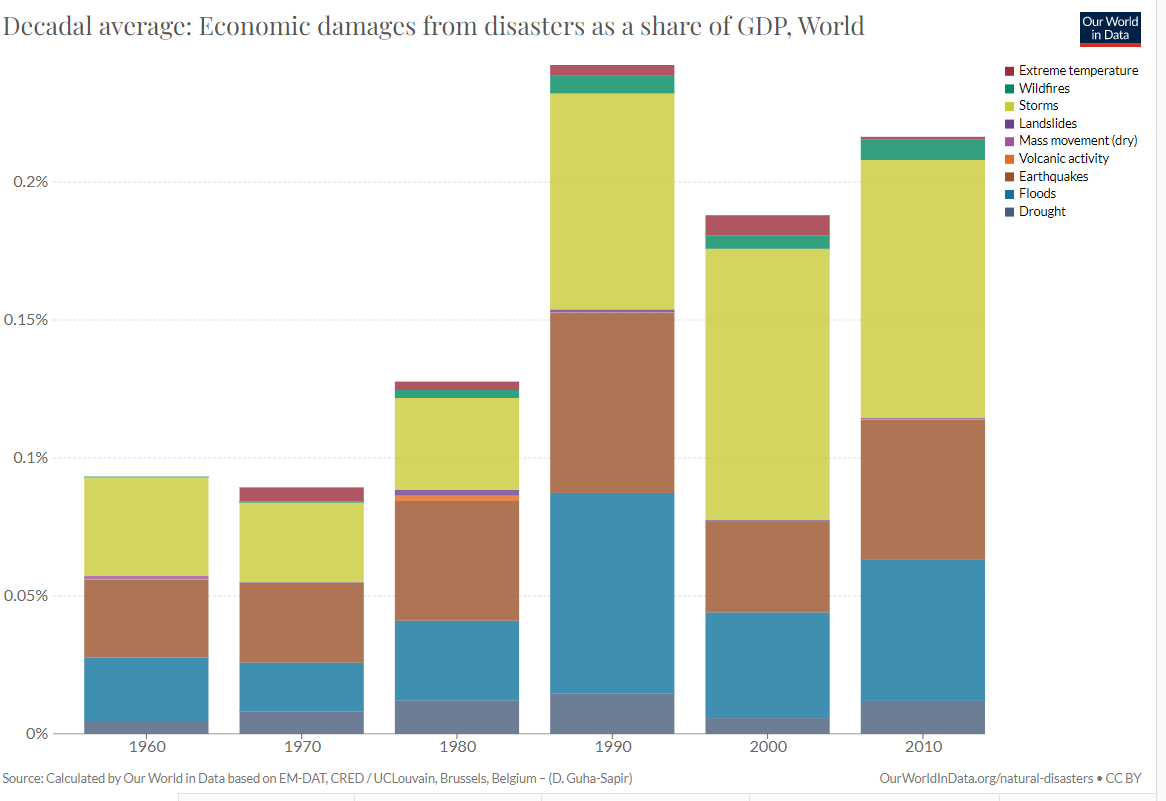

# Marc Kruiß

In [11]:
#getStatisticsForDisaster('storms')
#getStatisticsForDisaster(disasterTypes[1]) # information from earthquakes
#getCountries()
#getYears()
countriesDisasters = getAllDisastersForCountry(['Austria'])
#print(countriesDisasters)
getAllDisastersByYear(countriesDisasters, 2010)

,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,...,Total economic damages from landslides as a share of GDP,Total economic damages from mass movements as a share of GDP,Total economic damages from storms as a share of GDP,Total economic damages from volcanic activity as a share of GDP,Total economic damages from volcanic activity as a share of GDP.1,Entity,Year,deaths_rate_per_100k_storm,injured_rate_per_100k_storm,total_affected_rate_per_100k_all_disasters
115,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000029,0.0,0.0,Austria,2010,0.017953,0.136054,0.607904


In [12]:
from ipywidgets import interact, widgets
import urllib
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

def displayComparison(country_one, country_two,year):
    #sns.distplot(np.random.normal(1, var, 1000))
    try:
        countriesDisasters = getAllDisastersForCountry([country_one, country_two])
        countriesYearDisasters=getAllDisastersByYear(countriesDisasters,year)
        #print(countriesYearDisasters)
        sns.barplot(data=countriesYearDisasters, x="Entity",y="deaths_rate_per_100k_storm")
        plt.show()
    except Exception as e:
        print(e)
    

#countryDisasters = getAllDisastersForCountry(['austria', 'germany'])
print(getYears())
interact(displayComparison, 
         country_one=getCountries(),
         country_two=getCountries(), 
         year=widgets.IntSlider(min=getYears()[0], max=getYears()[-1], step=10, value=getYears()[0]))

[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]


interactive(children=(Dropdown(description='country_one', options=('Afghanistan', 'Africa', 'Albania', 'Algeri…

<function __main__.displayComparison(country_one, country_two, year)>

In [13]:
from ipywidgets import interact, widgets
import urllib
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

global representiveColumn
representiveColumn="deaths_rate_per_100k_storm"

def displayComparison(year, charRange, minValue):
    #sns.distplot(np.random.normal(1, var, 1000))
    countries = getCountries()
    print(charRange)
    print(minValue)
    try:
        countriesDisasters = getAllDisastersForCountry(countries)
        countriesYearDisasters=getAllDisastersByYear(countriesDisasters,year)
        
        countriesYearDisasters = countriesYearDisasters.drop(countriesYearDisasters.loc
              [
                  (countriesYearDisasters[representiveColumn] < minValue)|
                  (countriesYearDisasters["Entity"].str[0]<chr(charRange[0]))|
                  (chr(charRange[1])<countriesYearDisasters["Entity"].str[0])
                   ]
                   .index)
        currentMax = countriesYearDisasters[representiveColumn].max()
        print("Current max: "+str(currentMax))
        #print(countriesYearDisasters)
        plt.figure(figsize=(20,10))
        sns.set(font_scale = 1)
        sns.barplot(data=countriesYearDisasters, x="Entity",y=representiveColumn)
        plt.xticks(rotation=90)
        plt.show()
    except Exception as e:
        print("Exception: "+str(e))
    

#countryDisasters = getAllDisastersForCountry(['austria', 'germany'])
valueMax=getAllDisastersForCountry(getCountries())[representiveColumn].max()

interact(displayComparison, 
         year=widgets.IntSlider(min=getYears()[0], max=getYears()[-1], step=10, value=getYears()[0]),
        charRange=widgets.IntRangeSlider(
            value=[ord('A'),ord('Z')],
            min=ord('A'),
            max=ord('Z'),
            step=1,
            description='Char-Range:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d'),
         minValue=widgets.FloatSlider(
            value=0,
            min=0,
            max=valueMax,
            step=0.1,
            description='Min Value: ',
            disabled=False,
            continuous_update=False,
            orientation='vertical',
            readout=True,
            readout_format='.1f')
        )

interactive(children=(IntSlider(value=1900, description='year', max=2010, min=1900, step=10), IntRangeSlider(v…

<function __main__.displayComparison(year, charRange, minValue)>

<AxesSubplot:xlabel='Entity', ylabel='deaths_rate_per_100k_storm'>

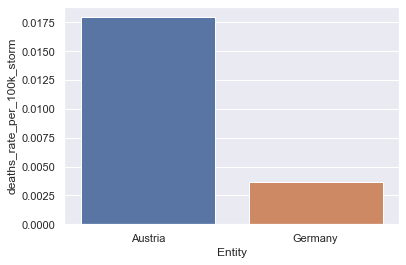

In [14]:
countriesDisasters = getAllDisastersForCountry(['Austria', 'Germany'])
#print(countriesDisasters)
countriesYearDisasters=getAllDisastersByYear(countriesDisasters,2010)
#print(countriesYearDisasters)
sns.barplot(data=countriesYearDisasters, x="Entity",y="deaths_rate_per_100k_storm")


## Map Visualization

In [85]:
"""import os
import json
import random
import requests

from ipyleaflet import Map, GeoJSON

if not os.path.exists('europe_110.geo.json'):
    url = 'https://github.com/jupyter-widgets/ipyleaflet/raw/master/examples/europe_110.geo.json'
    r = requests.get(url)
    with open('europe_110.geo.json', 'w') as f:
        f.write(r.content.decode("utf-8"))

with open('europe_110.geo.json', 'r') as f:
    data = json.load(f)

def random_color(feature):
    return {
        'color': 'black',
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }

m = Map(center=(50.6252978589571, 0.34580993652344), zoom=3)

geo_json = GeoJSON(
    data=data,
    style={
        'opacity': 1, 'dashArray': '9', 'fillOpacity': 0.1, 'weight': 1
    },
    hover_style={
        'color': 'white', 'dashArray': '0', 'fillOpacity': 0.5
    },
    style_callback=random_color
)
m.add_layer(geo_json)
m
"""

#function to convert to alpah2 country codes and continents
"""
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="country_visualizer")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan
    """
def color_producer(value, minValue, maxValue):
    
    if minValue <= value <= ((maxValue-minValue)*0.3):
        return 'green'
    elif ((maxValue-minValue)*0.3) <= value <= ((maxValue-minValue)*0.6):
        return 'orange'
    else:
        return 'red'

from random import seed
from random import randint
seed(1)

countryValueCoordDf = getCountriesWithCoordinates()
values=[]
targetValueColumn="Number of deaths from disasters"
year = 2010
for item in range(len(countryValueCoordDf)):
    currentCountry=countryValueCoordDf['Country'][item]
    currentValue=0
    try:
        currentValue=df.loc[(df['Entity']==currentCountry)&(df['Year']==year)][targetValueColumn].values[0]
        print(currentCountry+": "+str(currentValue))
    except:
        print('No Value for '+currentCountry)
    values.append(currentValue)
    
print("Values: "+ str(len(values)))
countryValueCoordDf["Value"]=values
print(countryValueCoordDf)

# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
import math
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
minValue = countryValueCoordDf['Value'].min()
maxValue = countryValueCoordDf['Value'].max()
print("Min: "+ str(minValue)+" , Max: "+str(maxValue))
for i in range(len(countryValueCoordDf)):
        lat = countryValueCoordDf.iloc[i]['Latitude']
        long = countryValueCoordDf.iloc[i]['Longitude']
        radius=5
        currentValue = countryValueCoordDf.iloc[i]['Value']
        popup_text = """ <b>Country: </b> {}<br>
                     <b>Value: </b> {}<br>"""
        popup_text = popup_text.format(countryValueCoordDf.iloc[i]['Country'],
                                   currentValue)
        
        currentColor = color_producer(currentValue, minValue, maxValue)
        print(str(currentValue) + ": "+ str(currentColor))
        if not math.isnan(lat) and not math.isnan(long):
            folium.CircleMarker(location = [lat, long], 
                                radius=radius, 
                                popup=popup_text, 
                                fill=True, 
                                color=currentColor).add_to(marker_cluster)
#show the map
world_map

Afghanistan: 263.1
Africa: 3283.3
Albania: 6.6
Algeria: 11.1
No Value for American Samoa
Angola: 44.2
Anguilla: 0.4
Antigua and Barbuda: 0.1
Argentina: 18.6
Armenia: 0.0
Asia: 11392.9
Australia: 26.2
Austria: 2.6
Azerbaijan: 0.8
Bahamas: 39.0
Bangladesh: 172.4
Barbados: 0.1
Belarus: 4.9
Belgium: 114.1
Belize: 0.0
Benin: 5.1
No Value for Bermuda
Bhutan: 0.1
Bolivia: 46.1
Bosnia and Herzegovina: 3.6
Botswana: 1.2
Brazil: 168.2
British Virgin Islands: 0.9
No Value for Brunei
Bulgaria: 6.7
Burkina Faso: 6.1
Burundi: 24.7
Cambodia: 52.6
Cameroon: 9.9
Canada: 9.6
Cape Verde: 0.9
No Value for Cayman Islands
Central African Republic: 0.5
Chad: 9.6
Chile: 85.5
China: 1493.1
Colombia: 171.7
Comoros: 1.2
Congo: 1.9
Costa Rica: 6.2
Cote d'Ivoire: 14.7
Croatia: 1.1
Cuba: 4.4
No Value for Cyprus
Czechia: 7.3
No Value for Czechoslovakia
Democratic Republic of Congo: 73.5
Denmark: 0.2
Djibouti: 1.3
Dominica: 9.4
Dominican Republic: 5.5
Ecuador: 79.2
Egypt: 22.5
El Salvador: 8.0
No Value for Eritrea
Es

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
# sample data
def displayPie(year, disaster):
    disasterColumn = "Number of deaths from "+disaster
    pieDf = pd.read_csv('preparedData.csv')
    #print(pieDf)
    try:
        pieDf=getAllDisastersForCountryAndYear(pieDf,['Australia','Europe','Asia','Africa','United States'], year)
        pieDf.groupby(['Entity']).sum().plot(kind='pie', y=disasterColumn, title=disasterColumn, figsize=(20,10))
    except:
        print("Keine Daten vorhanden!")

interact(displayPie,
         disaster=disasterTypes,
         year=widgets.IntSlider(min=getYears()[0], max=getYears()[-1], step=10, value=getYears()[0]))
"""
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
pieDf.plot(
    kind='pie', 
    y = ['Number of total people affected by extreme temperatures'], 
    ax=ax1, 
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=False, 
    labels=df['Entity'], 
    legend = False, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, df, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()
"""

interactive(children=(IntSlider(value=1900, description='year', max=2010, min=1900, step=10), Dropdown(descrip…

"\nplt.figure(figsize=(16,8))\n# plot chart\nax1 = plt.subplot(121, aspect='equal')\npieDf.plot(\n    kind='pie', \n    y = ['Number of total people affected by extreme temperatures'], \n    ax=ax1, \n    autopct='%1.1f%%', \n    startangle=90, \n    shadow=False, \n    labels=df['Entity'], \n    legend = False, fontsize=14)\n\n# plot table\nax2 = plt.subplot(122)\nplt.axis('off')\ntbl = table(ax2, df, loc='center')\ntbl.auto_set_font_size(False)\ntbl.set_fontsize(14)\nplt.show()\n"